In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from src.SugarScape import SugarScape
from mesa import batch_run
import numpy as np
from tqdm import tqdm

# Setup all folders
import os

folder = 'Segregation'
# Create Segregation Folder
if not os.path.exists(folder):
    os.mkdir(folder)

# Check if folder exists for saving base results
folder = f'{folder}/Base'
if not os.path.exists(folder):
    os.mkdir(folder)

# Base Simulation

In [2]:
scenarios = [
    {'vision_mean': 4.264199728146195, 'metabolism_mean': 6.751366691663861, 'max_age_mean': 96.55008263885976,
     'repopulate_factor': 7.485186895355582, 'cell_regeneration': 1.6743798777461052},   # Worst case
    
    {'vision_mean': 2.571960593573749, 'metabolism_mean': 7.285224918276071, 'max_age_mean': 93.18476642481984,
     'repopulate_factor': 5.733334645628929, 'cell_regeneration': 2.95167014375329},     # Best case
    
    {'vision_mean': 1.2129357354715466, 'metabolism_mean': 3.5813456028699875, 'max_age_mean': 96.730439318344,
     'repopulate_factor': 12.009924734011292, 'cell_regeneration': 1.5217601098120213},  # Average case
    
    {'vision_mean': 3.5, 'metabolism_mean': 6, 'max_age_mean': 85,
     'repopulate_factor': 10, 'cell_regeneration': 3},                                   # Balanced case
    
    {'vision_mean': 1.2129357354715466, 'metabolism_mean': 3.5813456028699875, 'max_age_mean': 100,
     'repopulate_factor': 5, 'cell_regeneration': 1.5217601098120213},                    # Slow evolving
    
    {'vision_mean': 5.089661035686731, 'metabolism_mean': 5.488567331805825, 'max_age_mean': 70,
     'repopulate_factor': 15, 'cell_regeneration': 3.368525765836239},                    # Fast evolving
]

results = []
replicates = 30
max_steps = 10

In [71]:
for scenario in scenarios:
    scenario['map_scheme'] = 'split'
    scenario['track_scheme'] = 'segregation'
    
    # Run simulation
    batches = batch_run(SugarScape, scenario, number_processes=None,
                          iterations=replicates, max_steps=max_steps, display_progress=True, data_collection_period=1)
    
    for i in range(replicates):
        # Get sugar metabolisms
        scenario['lower_sugar'] = [float(batch['Lower Sugar Metabolism']) for batch in batches[(max_steps+1)*i:(max_steps+1)*(i+1)]]
        scenario['middle_sugar'] = [float(batch['Middle Sugar Metabolism']) for batch in batches[(max_steps+1)*i:(max_steps+1)*(i+1)]]
        scenario['upper_sugar'] = [float(batch['Upper Sugar Metabolism']) for batch in batches[(max_steps+1)*i:(max_steps+1)*(i+1)]]
        
        # Get spice metabolisms
        scenario['lower_spice'] = [float(batch['Lower Spice Metabolism']) for batch in batches[(max_steps+1)*i:(max_steps+1)*(i+1)]]
        scenario['middle_spice'] = [float(batch['Middle Spice Metabolism']) for batch in batches[(max_steps+1)*i:(max_steps+1)*(i+1)]]
        scenario['upper_spice'] = [float(batch['Upper Spice Metabolism']) for batch in batches[(max_steps+1)*i:(max_steps+1)*(i+1)]]
        
        scenario['lower_vision'] = [float(batch['Lower Vision']) for batch in batches[(max_steps+1)*i:(max_steps+1)*(i+1)]]
        scenario['middle_vision'] = [float(batch['Middle Vision']) for batch in batches[(max_steps+1)*i:(max_steps+1)*(i+1)]]
        scenario['upper_vision'] = [float(batch['Upper Vision']) for batch in batches[(max_steps+1)*i:(max_steps+1)*(i+1)]]
        
        results.append(scenario)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

In [76]:
names = list(scenario.keys()) 
df = pd.DataFrame(results, columns=names)

# Save results
df.to_csv('Segregation/Base/results.csv')

# Experimenting with tax schemes

In [16]:
scenarios = [
    {'vision_mean': 4.264199728146195, 'metabolism_mean': 6.751366691663861, 'max_age_mean': 96.55008263885976,
     'repopulate_factor': 7.485186895355582, 'cell_regeneration': 1.6743798777461052},   # Worst case
    
    {'vision_mean': 2.571960593573749, 'metabolism_mean': 7.285224918276071, 'max_age_mean': 93.18476642481984,
     'repopulate_factor': 5.733334645628929, 'cell_regeneration': 2.95167014375329},     # Best case
    
    {'vision_mean': 1.2129357354715466, 'metabolism_mean': 3.5813456028699875, 'max_age_mean': 96.730439318344,
     'repopulate_factor': 12.009924734011292, 'cell_regeneration': 1.5217601098120213},  # Average case
    
    {'vision_mean': 3.5, 'metabolism_mean': 6, 'max_age_mean': 85,
     'repopulate_factor': 10, 'cell_regeneration': 3},                                   # Balanced case
    
    {'vision_mean': 1.2129357354715466, 'metabolism_mean': 3.5813456028699875, 'max_age_mean': 100,
     'repopulate_factor': 5, 'cell_regeneration': 1.5217601098120213},                    # Slow evolving
    
    {'vision_mean': 5.089661035686731, 'metabolism_mean': 5.488567331805825, 'max_age_mean': 70,
     'repopulate_factor': 15, 'cell_regeneration': 3.368525765836239},                    # Fast evolving
]

tax_systems = [
    ("progressive", "needs"),
    ("flat", "flat"),
    ("regressive", "random"),
    ("luxury", "progressive"),
    ("progressive", "progressive")
]

tax_rates = [0.1, 0.25, 0.4]

results = []
replicates = 3
max_steps = 2

In [17]:
with tqdm(total=len(scenarios), ncols=70) as pbar:
    for scenario in scenarios:
        for tax_system in tax_systems:
            for tax_rate in tax_rates:
                # Add parameters
                scenario_copy = scenario.copy()
                scenario_copy['tax_scheme'] = tax_system[0]
                scenario_copy['distributer_scheme'] = tax_system[1]
                scenario_copy['tax_rate'] = tax_rate
                scenario_copy['map_scheme'] = 'split'
                scenario_copy['track_scheme'] = 'segregation'
                
                # Run simulation
                batches = batch_run(SugarScape, scenario_copy, number_processes=None,
                                      iterations=replicates, max_steps=max_steps, display_progress=False, data_collection_period=1)
                
                for i in range(replicates):
                    # Get sugar metabolisms
                    scenario_copy['lower_sugar'] = [float(batch['Lower Sugar Metabolism']) for batch in batches[(max_steps+1)*i:(max_steps+1)*(i+1)]]
                    scenario_copy['middle_sugar'] = [float(batch['Middle Sugar Metabolism']) for batch in batches[(max_steps+1)*i:(max_steps+1)*(i+1)]]
                    scenario_copy['upper_sugar'] = [float(batch['Upper Sugar Metabolism']) for batch in batches[(max_steps+1)*i:(max_steps+1)*(i+1)]]
                    
                    # Get spice metabolisms
                    scenario_copy['lower_spice'] = [float(batch['Lower Spice Metabolism']) for batch in batches[(max_steps+1)*i:(max_steps+1)*(i+1)]]
                    scenario_copy['middle_spice'] = [float(batch['Middle Spice Metabolism']) for batch in batches[(max_steps+1)*i:(max_steps+1)*(i+1)]]
                    scenario_copy['upper_spice'] = [float(batch['Upper Spice Metabolism']) for batch in batches[(max_steps+1)*i:(max_steps+1)*(i+1)]]
                    
                    scenario_copy['lower_vision'] = [float(batch['Lower Vision']) for batch in batches[(max_steps+1)*i:(max_steps+1)*(i+1)]]
                    scenario_copy['middle_vision'] = [float(batch['Middle Vision']) for batch in batches[(max_steps+1)*i:(max_steps+1)*(i+1)]]
                    scenario_copy['upper_vision'] = [float(batch['Upper Vision']) for batch in batches[(max_steps+1)*i:(max_steps+1)*(i+1)]]
                    
                    results.append(scenario_copy)
        pbar.update(1)

100%|███████████████████████████████████| 6/6 [01:52<00:00, 18.74s/it]


In [18]:
names = list(scenario_copy.keys()) 
df = pd.DataFrame(results, columns=names)

# Save results
df.to_csv('Segregation/results.csv')

# Plotting Results

In [4]:
def safe_eval(value):
    try:
        return eval(value)
    except:
        return value

def read_csv(file, cols):
    df = pd.read_csv(file)
    for column in df.columns:
        df[column] = df[column].apply(safe_eval)
    return df

# Load results
df = pd.read_csv('Segregation/results.csv')
df_base = pd.read_csv('Segregation/Base/results.csv')

In [5]:
# Setting positions and variable names
positions = ['lower', 'middle', 'upper']
variables = ['sugar', 'spice', 'vision']

# Converting to arrays
for position in positions:
    for variable in variables:
        df[f'{position}_{variable}'] = df[f'{position}_{variable}'].apply(safe_eval)
        df_base[f'{position}_{variable}'] = df_base[f'{position}_{variable}'].apply(safe_eval)

In [6]:
def scenario_group(df):
    name_scenarios = ['Worst', 'Best', 'Typical', 'Balanced', 'Slow evolving', 'Fast evolving']
    parameters = ['vision_mean', 'metabolism_mean', 'max_age_mean', 'repopulate_factor', 'cell_regeneration']
    scenarios = [
        {'vision_mean': 4.264199728146195, 'metabolism_mean': 6.751366691663861, 'max_age_mean': 96.55008263885976,
         'repopulate_factor': 7.485186895355582, 'cell_regeneration': 1.6743798777461052},   # Worst case
        
        {'vision_mean': 2.571960593573749, 'metabolism_mean': 7.285224918276071, 'max_age_mean': 93.18476642481984,
         'repopulate_factor': 5.733334645628929, 'cell_regeneration': 2.95167014375329},     # Best case
        
        {'vision_mean': 1.2129357354715466, 'metabolism_mean': 3.5813456028699875, 'max_age_mean': 96.730439318344,
         'repopulate_factor': 12.009924734011292, 'cell_regeneration': 1.5217601098120213},  # Average case
        
        {'vision_mean': 3.5, 'metabolism_mean': 6, 'max_age_mean': 85,
         'repopulate_factor': 10, 'cell_regeneration': 3},                                   # Balanced case
        
        {'vision_mean': 1.2129357354715466, 'metabolism_mean': 3.5813456028699875, 'max_age_mean': 100,
         'repopulate_factor': 5, 'cell_regeneration': 1.5217601098120213},                    # Slow evolving
        
        {'vision_mean': 5.089661035686731, 'metabolism_mean': 5.488567331805825, 'max_age_mean': 70,
         'repopulate_factor': 15, 'cell_regeneration': 3.368525765836239},                    # Fast evolving
    ]
    
    # Group df
    grouped = df.groupby(parameters)
    
    # Saving as dict
    scenarios_dict = {}
    
    for name, values in grouped:
        for i, scenario in enumerate(scenarios):
            if all(scenario[key] == name[j] for j, key in enumerate(parameters)):
                scenarios_dict[name_scenarios[i]] = values.reset_index()
                break
    
    return scenarios_dict
    

def mean_ci(df):
    # Get all positions and variables
    positions = ['lower', 'middle', 'upper']
    variables = ['sugar', 'spice', 'vision']
    
    # Dict to save results
    results = {}
    
    # Looping through each position
    for position in positions:
        # Looping through each variable
        for variable in variables:
            # Get values
            values = df[f'{position}_{variable}']
            
            # Converting to array
            values = np.vstack(values)
            
            # Get mean over last 20 steps
            mean = np.mean(values[:, -20:], axis=1)
            
            # Compute mean and confidence interval
            ci = 1.96 * np.std(mean, ddof=1) / np.sqrt(len(mean))
            mean = np.mean(mean)
            
            # Save results
            results[f'{position}_{variable}'] = (mean, ci)
    
    return results
    
        
    

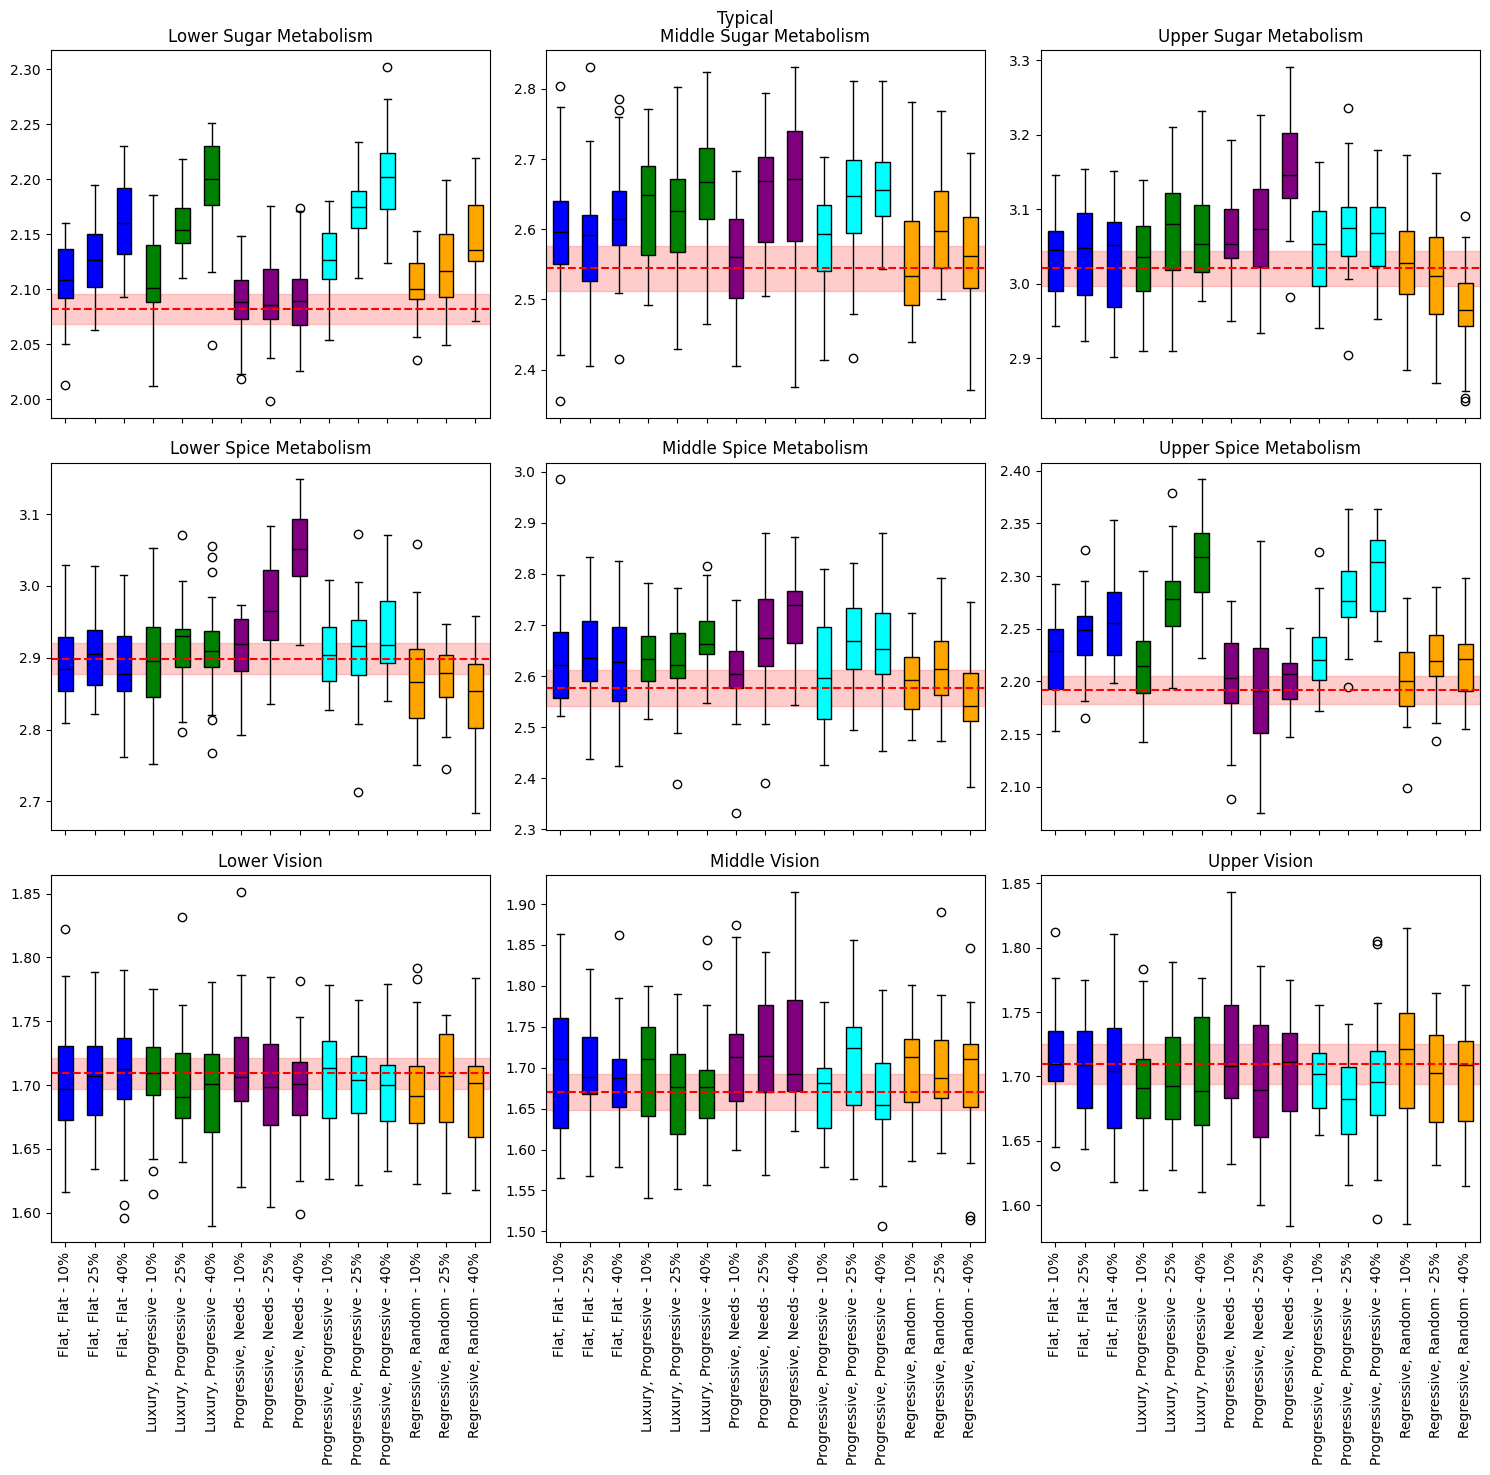

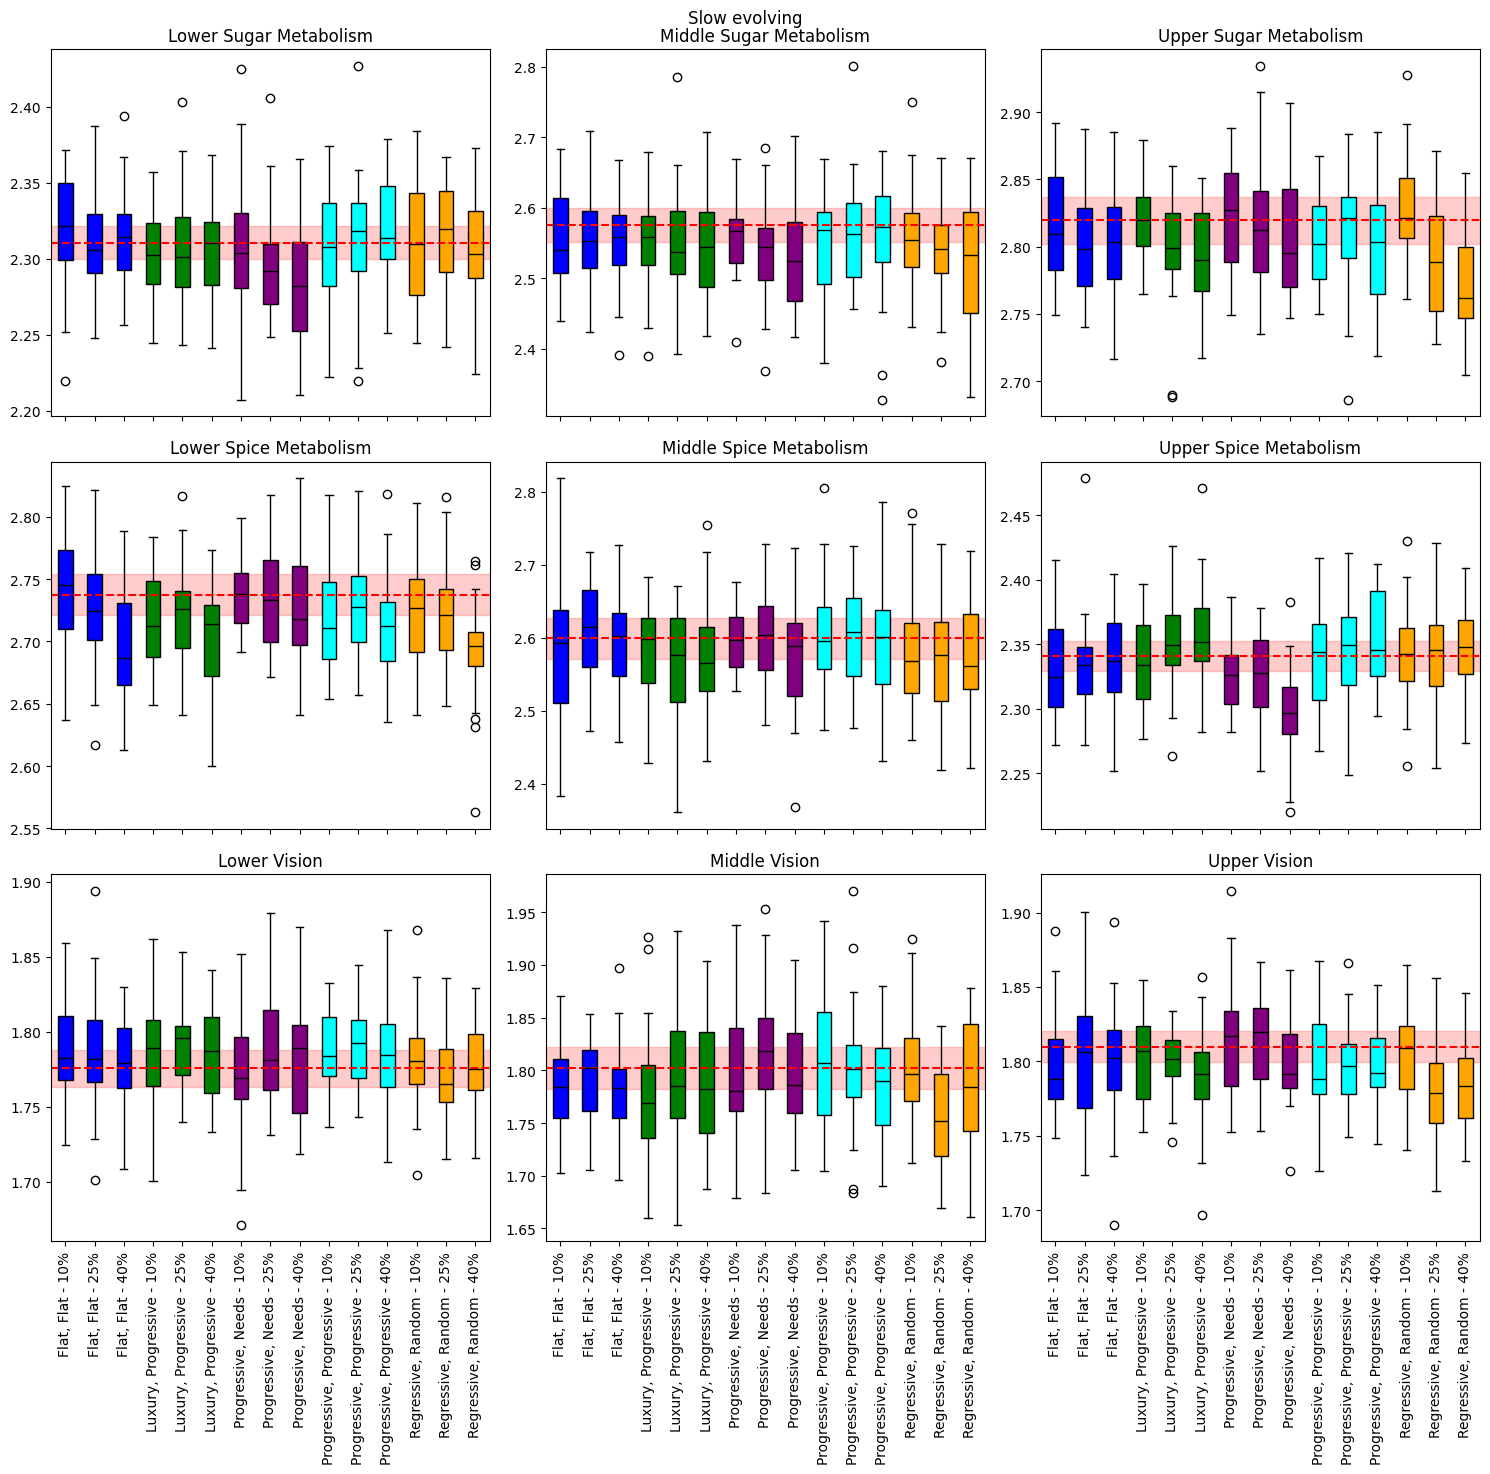

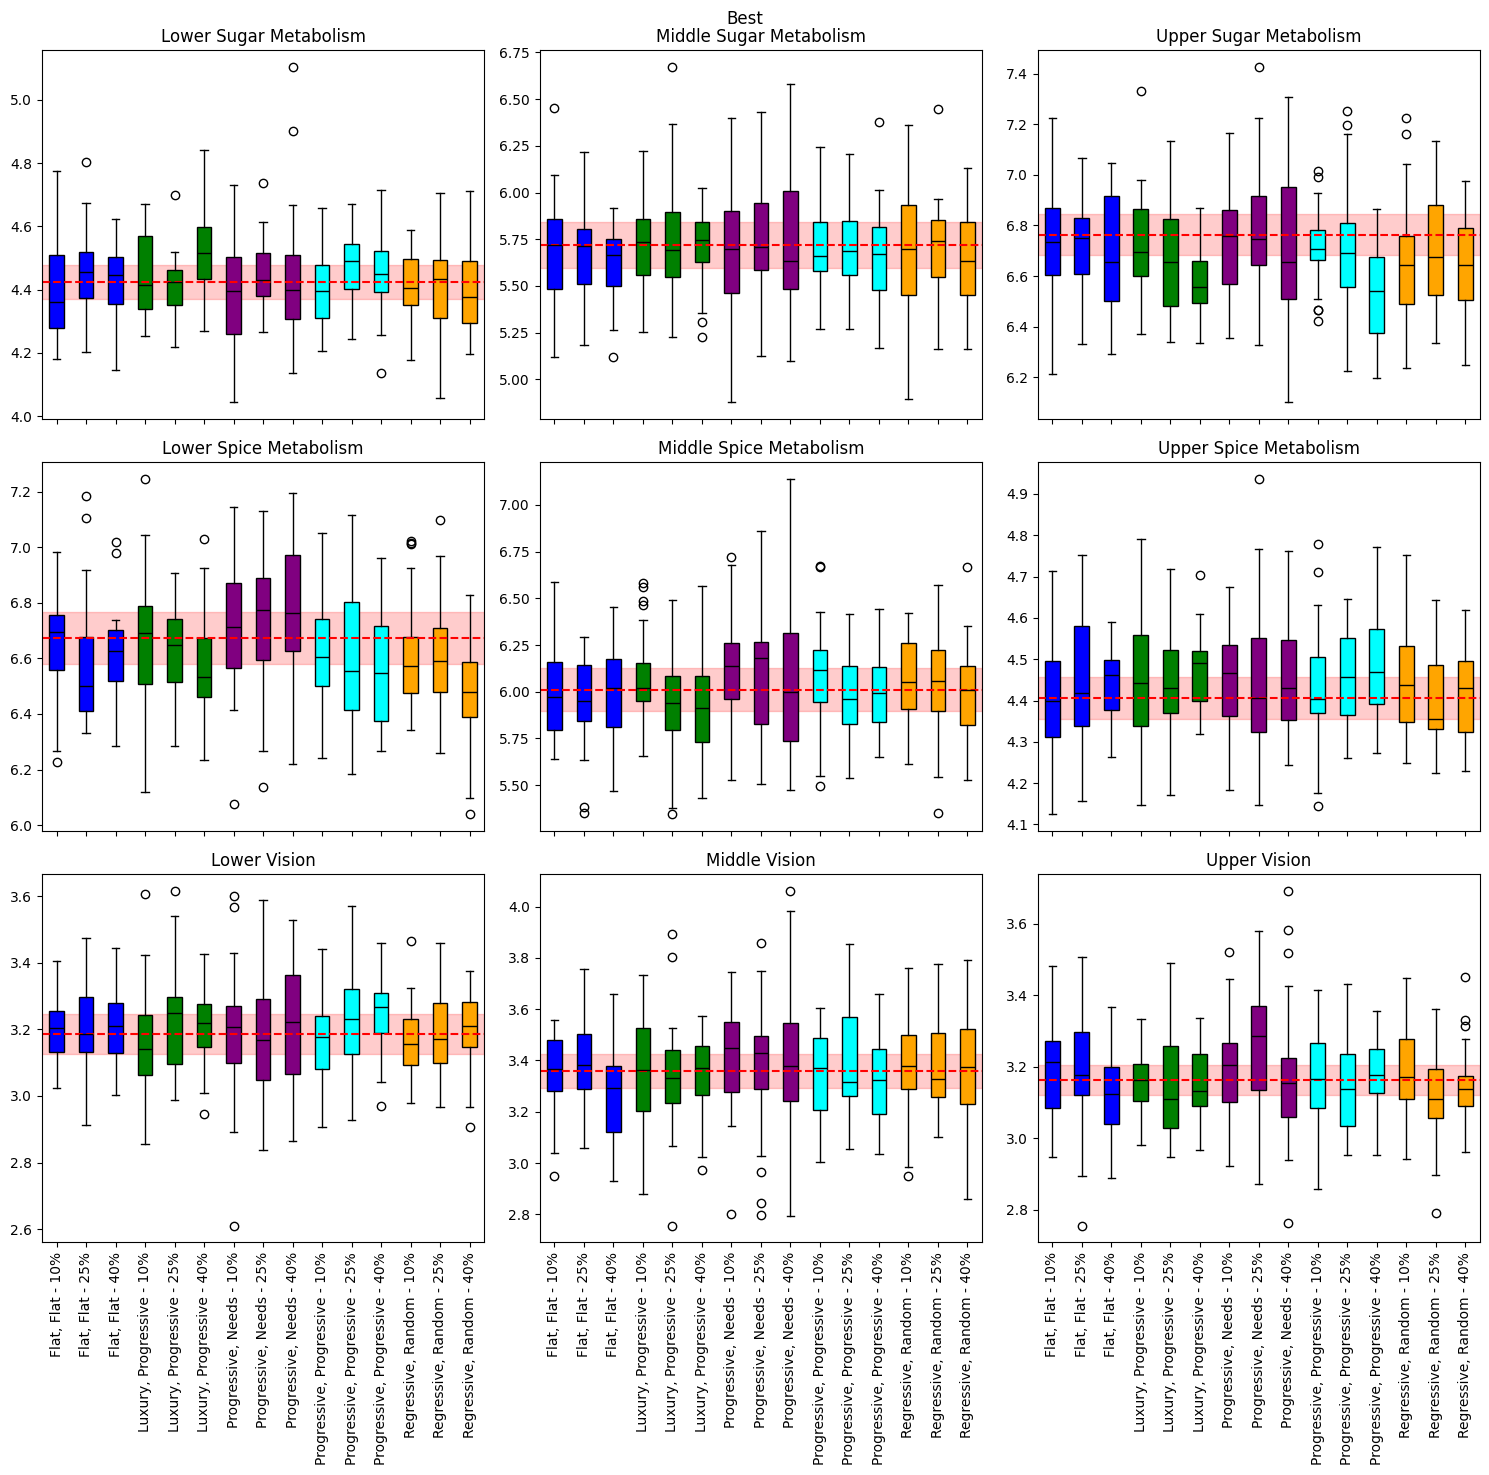

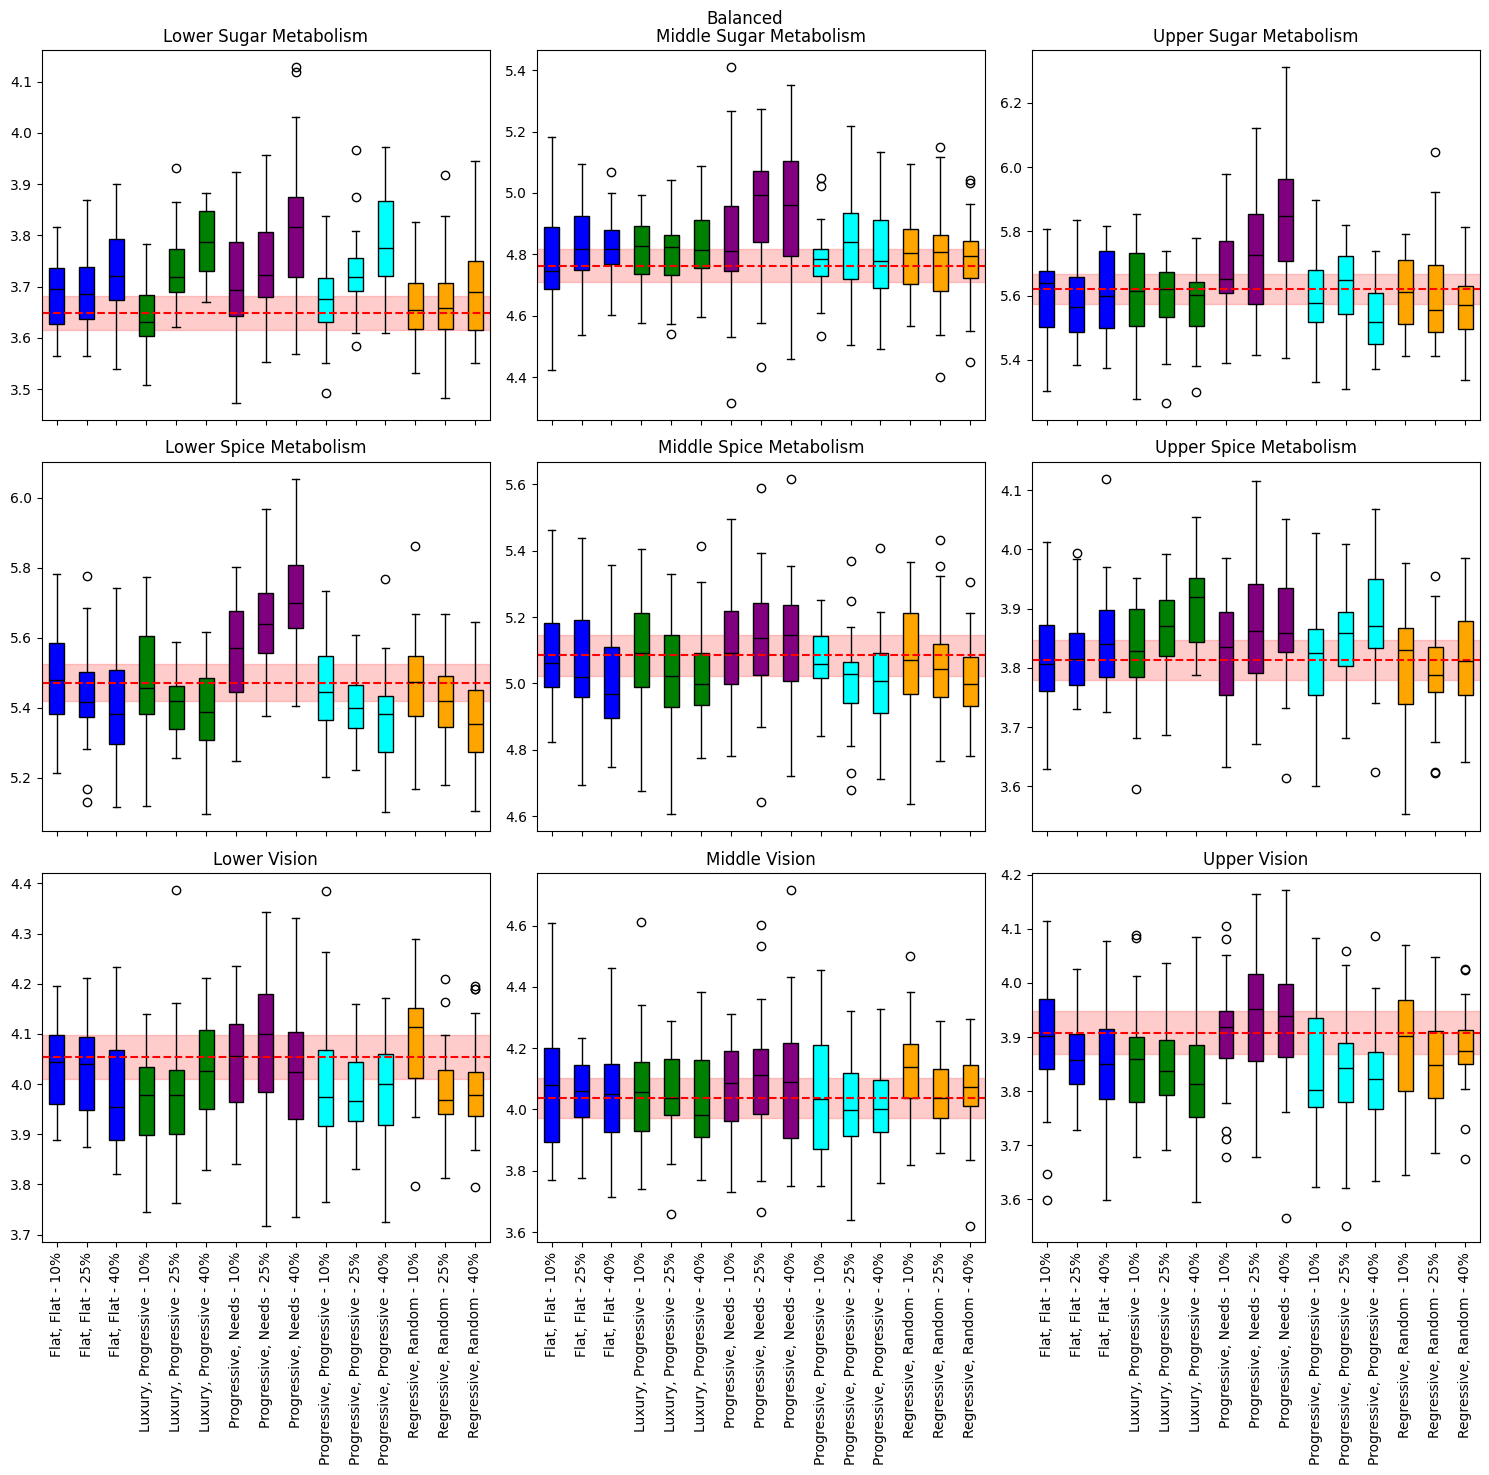

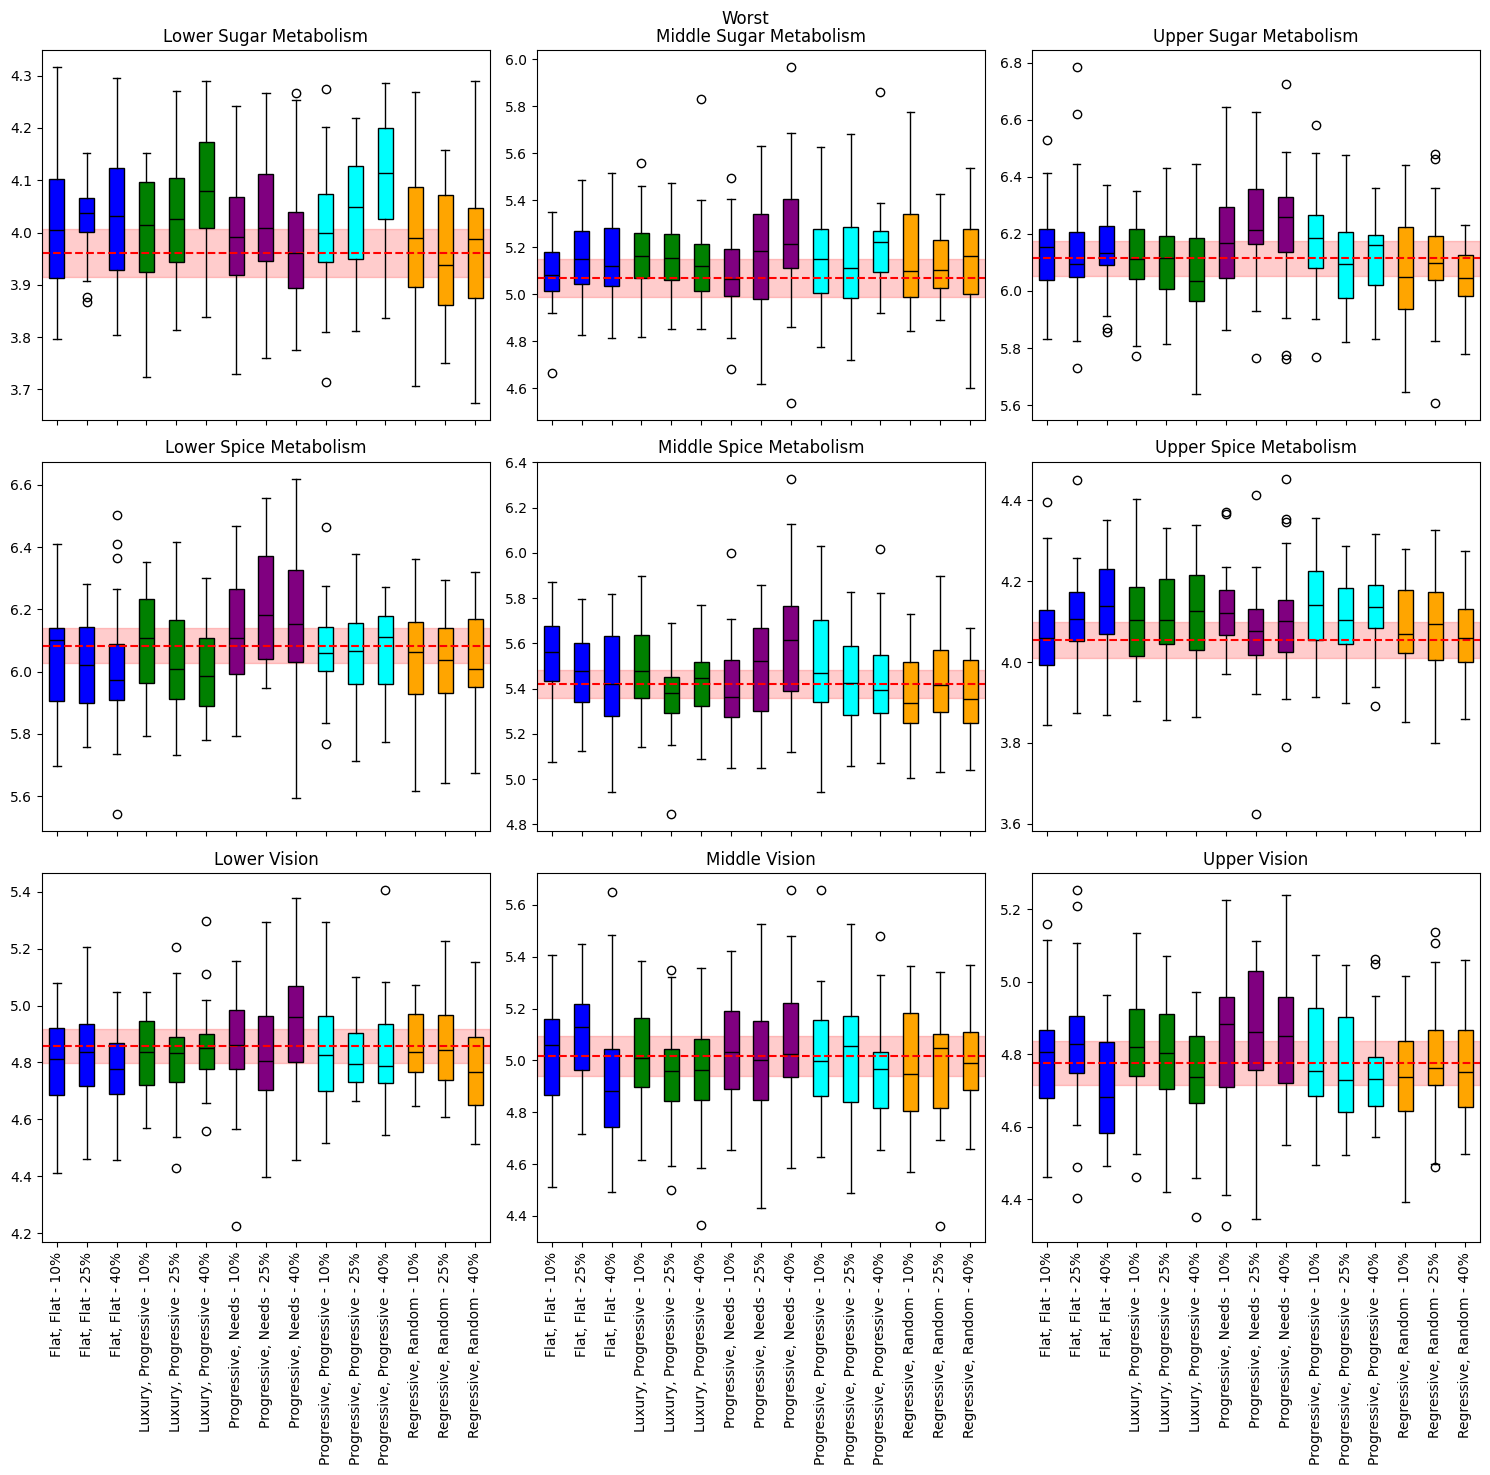

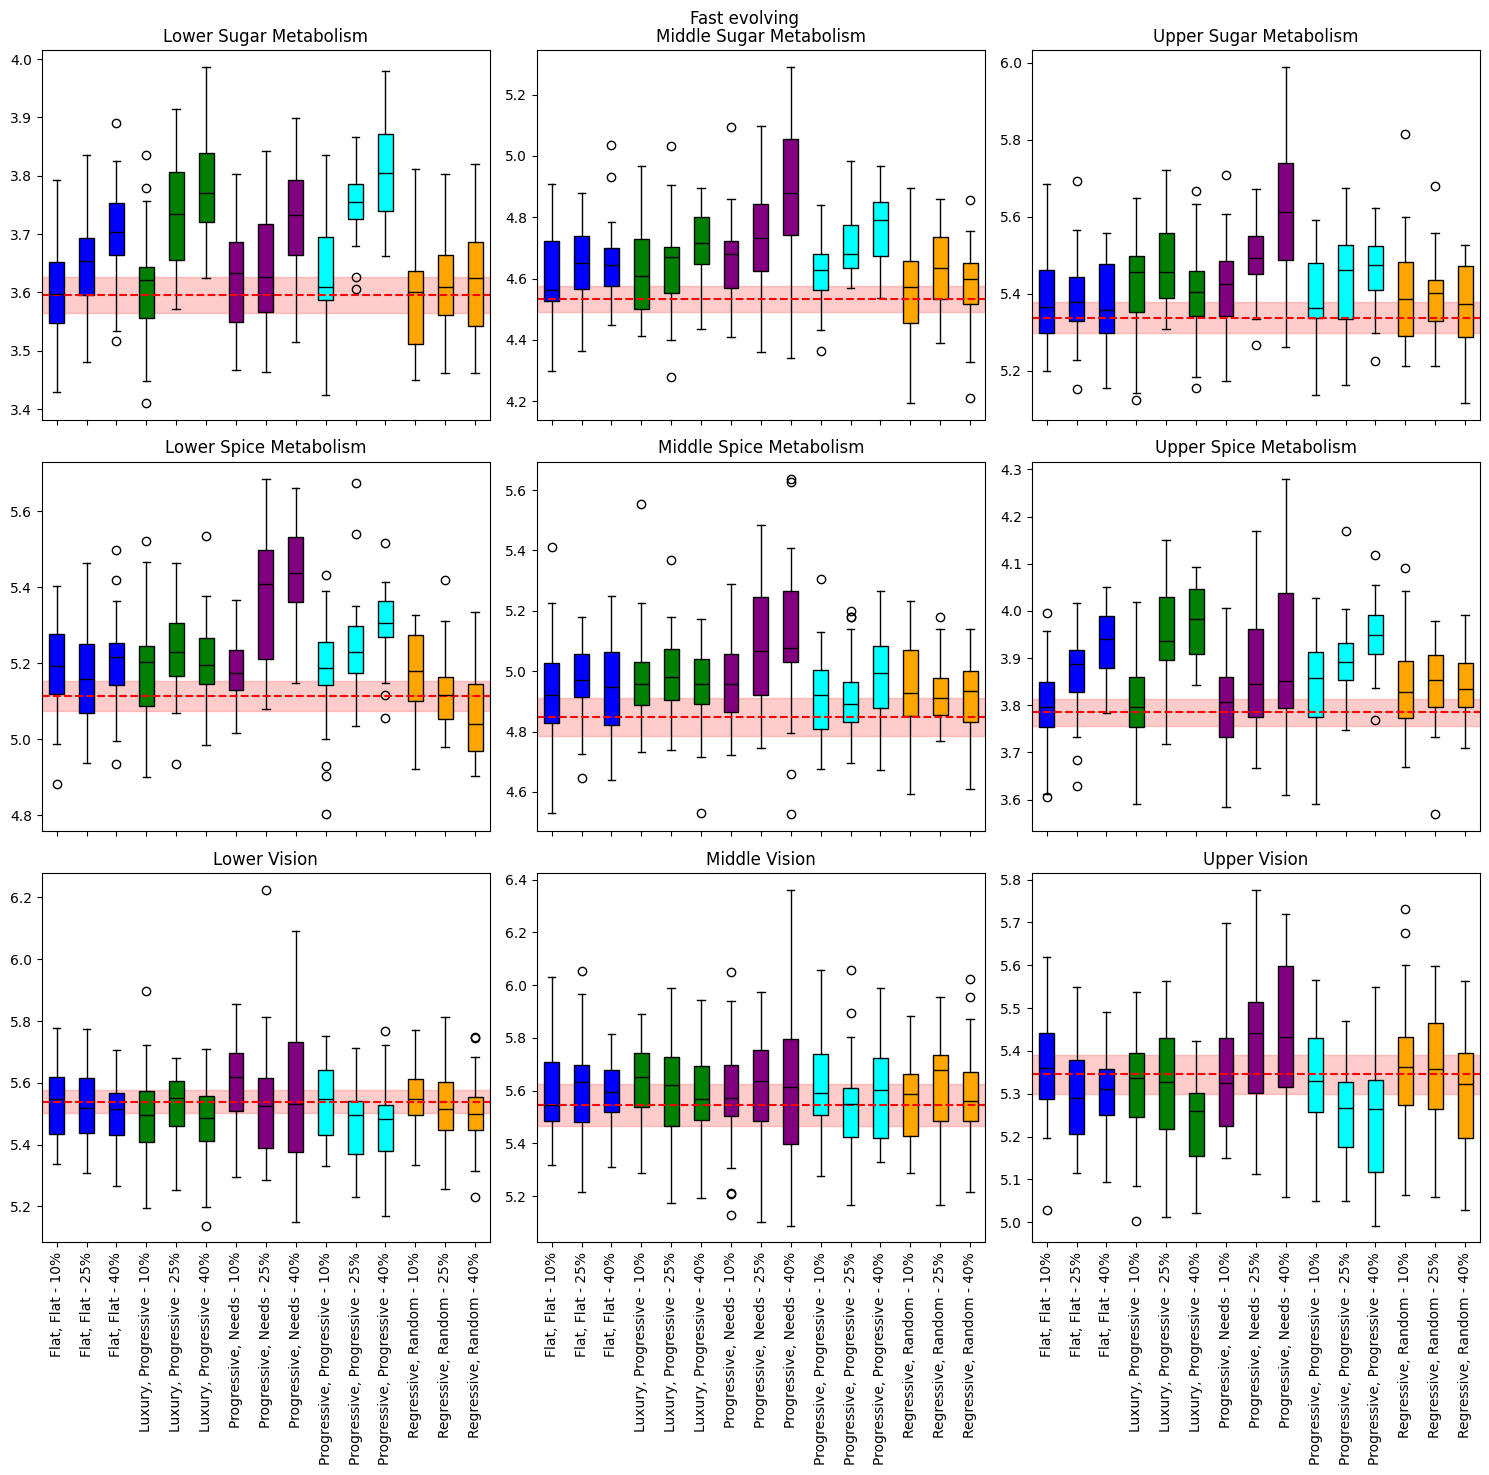

In [7]:
# Get all scenarios
scenarios = scenario_group(df)
scenarios_base = scenario_group(df_base)

# Get all positions and variables
positions = ['lower', 'middle', 'upper']
variables = ['sugar', 'spice', 'vision']

# Looping through each scenario
for scenario in scenarios:
    # Create figure
    fig, ax = plt.subplots(3, 3, figsize=(15, 15))
    
    # Get scenario
    df_scenario = scenarios[scenario]
    df_scenario_base = scenarios_base[scenario]
    
    # Get mean and ci of base
    base = mean_ci(df_scenario_base)
    
    # Saving values for boxplots
    boxes = {}
    
    # Group based on tax system
    grouped = df_scenario.groupby(['tax_scheme', 'distributer_scheme'])
    
    # Looping through each group
    for name, group in grouped:
        # Grouping based on tax_rate
        grouped_tax = group.groupby('tax_rate')
        
        for name2, group_tax in grouped_tax:
            # Looping through each position and variable
            for variable in variables:
                if variable not in boxes:
                    boxes[variable] = {}
                for position in positions:
                    if position not in boxes[variable]:
                        boxes[variable][position] = {}
                    # Get values
                    values = group_tax[f'{position}_{variable}']
                    
                    # Converting to array
                    values = np.vstack(values)
                    
                    # Get mean over last 20 steps
                    mean = np.mean(values[:, -20:], axis=1)
                    
                    # Create label
                    label = f'{name[0].capitalize()}, {name[1].capitalize()} - {name2 * 100:.0f}%'
                    
                    # Save values
                    boxes[variable][position][label] = mean
    
    # Looping through each variable
    for i, variable in enumerate(variables):
        for j, position in enumerate(positions):
            # Place title
            affix = ''
            if variable == 'sugar' or variable == 'spice':
                affix = ' Metabolism'
            ax[i, j].set_title(f'{position.capitalize()} {variable.capitalize()}{affix}')
            
            # Plot boxplot
            box = ax[i, j].boxplot(boxes[variable][position].values(), tick_labels=boxes[variable][position].keys(), patch_artist=True)
            
            # Plot base
            ax[i, j].axhline(base[f'{position}_{variable}'][0], color='r', linestyle='--')
            ax[i, j].axhspan(base[f'{position}_{variable}'][0] - base[f'{position}_{variable}'][1], 
                             base[f'{position}_{variable}'][0] + base[f'{position}_{variable}'][1], 
                             color='r', alpha=0.2)
            
            # Set boxplot colors in groups of three
            colors = ['blue', 'green', 'purple', 'cyan', 'orange']
            for j, patch in enumerate(box['boxes']):
                color = colors[j // 3]
                patch.set_facecolor(color)
                
            # Set median bar color
            for median in box['medians']:
                median.set_color('black')
            
        if i < 2:
            # Remove x-tick labels
            plt.setp(ax[i, :], xticklabels=[])
        else:
            # Rotate x-tick labels
            for k in range(3):
                ax[i, k].tick_params(axis='x', rotation=90)
    
    # Add super title
    fig.suptitle(f'{scenario.capitalize()}')
    fig.tight_layout()
    
    # Save figure
    plt.savefig(f'Segregation/{scenario}.png', dpi=300, bbox_inches='tight')

In [58]:
# Print all functions of box object